In [1]:
import ROOT
import numpy as np
from array import array
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1I, TH1F, TH2F, TH3F, TColor, TEfficiency
from ROOT import gROOT, gBenchmark, gRandom, gSystem
import star_phenix_comp_data as comp

In [ ]:
%cd /sphenix/u/egm2153/spring_2023
gROOT.LoadMacro("sPhenixStyle.C");
gROOT.ProcessLine("SetsPhenixStyle()")

In [2]:
%cd /sphenix/user/egm2153/calib_study/detdeta/analysis/Run2024

/gpfs/mnt/gpfs02/sphenix/user/egm2153/calib_study/detdeta/analysis/Run2024


/cvmfs/sphenix.sdcc.bnl.gov/alma9.2-gcc-14.2.0/opt/sphenix/core/lib/python3.13/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
direct = "spring_2025/detdeta_run24_plots"

In [4]:
rgb = [[160,200,221],[31,120,180],[178,223,138],[51,160,44],[251,154,153],[227,26,28],[253,191,111],[255,127,0],[202,178,214]]
colors = [TColor.GetColor(rgb[i][0],rgb[i][1],rgb[i][2]) for i in range(len(rgb))]
error_colors = [TColor.GetColor(rgb[i][0],rgb[i][1],rgb[i][2]) for i in range(len(rgb))]
colors.insert(0, ROOT.kGray+2)
error_colors.insert(0, ROOT.kGray)
colors[1] = ROOT.kAzure-4
colors[6] = ROOT.kRed+1
error_colors[6] = ROOT.kRed-4

In [5]:
cents = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60']
leg_tags = ['IHCal','OHCal','Full Calorimeter','EMCal','HCal']
emcal_detdeta = []
ihcal_detdeta = []
ohcal_detdeta = []
calo_detdeta = []
hcal_detdeta = []
emcal_unc = []
ihcal_unc = []
ohcal_unc = []
calo_unc = []
hcal_unc = []
emcal_correction = []
ihcal_correction = []
ohcal_correction = []
calo_correction = []
hcal_correction = []
epos_detdeta = []
epos_hnpart = []
ampt_detdeta = []
ampt_hnpart = []
hijing_detdeta = []
hijing_hnpart = []

for i, cent in enumerate(cents):
    infile = 'fixed_build/dETdeta_analysis_allruns_ana450_2024p009_100_50_50_ZS_hcal_tsc_emcal_calib_iter15_nozs_data_noweight_'+cent+'.root'
    f1 = ROOT.TFile.Open(infile)
    emcal_detdeta.append(TH1F(f1.Get("h_eT_eta_emcal_profile_hist")))
    ihcal_detdeta.append(TH1F(f1.Get("h_eT_eta_ihcal_profile_hist")))
    ohcal_detdeta.append(TH1F(f1.Get("h_eT_eta_ohcal_profile_hist")))
    calo_detdeta.append(TH1F(f1.Get("h_eT_eta_calo_profile_hist")))
    hcal_detdeta.append(TH1F(f1.Get("h_eT_eta_hcal_profile_hist")))
    emcal_detdeta[i].SetDirectory(0)
    ihcal_detdeta[i].SetDirectory(0)
    ohcal_detdeta[i].SetDirectory(0)
    calo_detdeta[i].SetDirectory(0)
    hcal_detdeta[i].SetDirectory(0)
    f1.Close()
    pedestalfile = 'pedestal_subtraction/dETdeta_analysis_pedestal_subtraction_54256_fixed_build_default_bins.root'
    f1 = ROOT.TFile.Open(pedestalfile)
    emcal_pedestal = TH1F(f1.Get("h_eT_eta_emcal_profile_hist"))
    ihcal_pedestal = TH1F(f1.Get("h_eT_eta_ihcal_profile_hist"))
    ohcal_pedestal = TH1F(f1.Get("h_eT_eta_ohcal_profile_hist"))
    calo_pedestal = TH1F(f1.Get("h_eT_eta_calo_profile_hist"))
    hcal_pedestal = TH1F(f1.Get("h_eT_eta_hcal_profile_hist"))
    emcal_pedestal.SetDirectory(0)
    ihcal_pedestal.SetDirectory(0)
    ohcal_pedestal.SetDirectory(0)
    calo_pedestal.SetDirectory(0)
    hcal_pedestal.SetDirectory(0)
    f1.Close()
    mcfile = 'fixed_build/dETdeta_analysis_allruns_run14_with_npart_nozs_mc_reweight_'+cent+'_reweight_epos_2024.root'
    f2 = ROOT.TFile.Open(mcfile)
    emcal_correction.append(TH1F(f2.Get("h_emcal_correction")))
    ihcal_correction.append(TH1F(f2.Get("h_ihcal_correction")))
    ohcal_correction.append(TH1F(f2.Get("h_ohcal_correction")))
    calo_correction.append(TH1F(f2.Get("h_calo_correction")))
    hcal_correction.append(TH1F(f2.Get("h_hcal_correction")))
    emcal_correction[i].SetDirectory(0)
    ihcal_correction[i].SetDirectory(0)
    ohcal_correction[i].SetDirectory(0)
    calo_correction[i].SetDirectory(0)
    hcal_correction[i].SetDirectory(0)
    f2.Close()
    f3 = ROOT.TFile.Open('fixed_build/dETdeta_analysis_allruns_run14_with_npart_nozs_mc_reweight_'+cent+'_epos_2024.root')
    epos_detdeta.append(TH1F(f3.Get("hetdeta_calobin")))
    epos_hnpart.append(TH1F(f3.Get("h_npart")))
    epos_detdeta[i].SetDirectory(0)
    epos_hnpart[i].SetDirectory(0)
    f3.Close()
    f3 = ROOT.TFile.Open('fixed_build/dETdeta_analysis_allruns_run14_with_npart_nozs_mc_reweight_'+cent+'_ampt_2024.root')
    ampt_detdeta.append(TH1F(f3.Get("hetdeta_calobin")))
    ampt_hnpart.append(TH1F(f3.Get("h_npart")))
    ampt_detdeta[i].SetDirectory(0)
    ampt_hnpart[i].SetDirectory(0)
    f3.Close()
    f3 = ROOT.TFile.Open('fixed_build/dETdeta_analysis_allruns_run14_with_npart_nozs_mc_reweight_'+cent+'_hijing_2024.root')
    hijing_detdeta.append(TH1F(f3.Get("hetdeta_calobin")))
    hijing_hnpart.append(TH1F(f3.Get("h_npart")))
    hijing_detdeta[i].SetDirectory(0)
    hijing_hnpart[i].SetDirectory(0)
    f3.Close()
    f5 = ROOT.TFile.Open("fixed_build/dETdeta_total_variation_"+cent+".root")
    #f5 = ROOT.TFile.Open("dETdeta_total_variation_w_hcal_"+cent+".root")
    emcal_unc.append(TH1F(f5.Get("emcal_detdeta_dev")))
    ihcal_unc.append(TH1F(f5.Get("ihcal_detdeta_dev")))
    ohcal_unc.append(TH1F(f5.Get("ohcal_detdeta_dev")))
    calo_unc.append(TH1F(f5.Get("calo_detdeta_dev")))
    hcal_unc.append(TH1F(f5.Get("hcal_detdeta_dev")))
    emcal_unc[i].SetDirectory(0)
    ihcal_unc[i].SetDirectory(0)
    ohcal_unc[i].SetDirectory(0)
    calo_unc[i].SetDirectory(0)
    hcal_unc[i].SetDirectory(0)
    f5.Close()
    
for i in range(len(cents)):
    for j in range(1, emcal_detdeta[i].GetNbinsX() + 1):
        emcal_detdeta[i].SetBinContent(j, emcal_detdeta[i].GetBinContent(j) - emcal_pedestal.GetBinContent(j))
        emcal_detdeta[i].SetBinError(j, np.sqrt(emcal_detdeta[i].GetBinError(j)**2 + emcal_pedestal.GetBinError(j)**2))
    for j in range(1, ihcal_detdeta[i].GetNbinsX() + 1):
        ihcal_detdeta[i].SetBinContent(j, ihcal_detdeta[i].GetBinContent(j) - ihcal_pedestal.GetBinContent(j))
        ihcal_detdeta[i].SetBinError(j, np.sqrt(ihcal_detdeta[i].GetBinError(j)**2 + ihcal_pedestal.GetBinError(j)**2))
    for j in range(1, ohcal_detdeta[i].GetNbinsX() + 1):
        ohcal_detdeta[i].SetBinContent(j, ohcal_detdeta[i].GetBinContent(j) - ohcal_pedestal.GetBinContent(j))
        ohcal_detdeta[i].SetBinError(j, np.sqrt(ohcal_detdeta[i].GetBinError(j)**2 + ohcal_pedestal.GetBinError(j)**2))
    for j in range(1, calo_detdeta[i].GetNbinsX() + 1):
        calo_detdeta[i].SetBinContent(j, calo_detdeta[i].GetBinContent(j) - calo_pedestal.GetBinContent(j))
        calo_detdeta[i].SetBinError(j, np.sqrt(calo_detdeta[i].GetBinError(j)**2 + calo_pedestal.GetBinError(j)**2))
    for j in range(1, hcal_detdeta[i].GetNbinsX() + 1):
        hcal_detdeta[i].SetBinContent(j, hcal_detdeta[i].GetBinContent(j) - hcal_pedestal.GetBinContent(j))
        hcal_detdeta[i].SetBinError(j, np.sqrt(hcal_detdeta[i].GetBinError(j)**2 + hcal_pedestal.GetBinError(j)**2))

In [6]:
for i in range(len(cents)):
    emcal_detdeta[i].Divide(emcal_correction[i])
    ihcal_detdeta[i].Divide(ihcal_correction[i])
    ohcal_detdeta[i].Divide(ohcal_correction[i])
    calo_detdeta[i].Divide(calo_correction[i])
    hcal_detdeta[i].Divide(hcal_correction[i])

In [7]:
emcal_correct = []
ihcal_correct = []
ohcal_correct = []
calo_correct = []
hcal_correct = []
for i in range(len(cents)):
    emcal_correction[i].Rebin(24)
    emcal_correction[i].Scale(1.0/24)
    ihcal_correction[i].Rebin(24)
    ihcal_correction[i].Scale(1.0/24)
    ohcal_correction[i].Rebin(24)
    ohcal_correction[i].Scale(1.0/24)
    calo_correction[i].Rebin(24)
    calo_correction[i].Scale(1.0/24)
    hcal_correction[i].Rebin(24)
    hcal_correction[i].Scale(1.0/24)
    emcal_correct.append(emcal_correction[i].GetBinContent(1))
    ihcal_correct.append(ihcal_correction[i].GetBinContent(1))
    ohcal_correct.append(ohcal_correction[i].GetBinContent(1))
    calo_correct.append(calo_correction[i].GetBinContent(1))
    hcal_correct.append(hcal_correction[i].GetBinContent(1))
print((emcal_correct[-1]-emcal_correct[0])/np.mean(emcal_correct))
print((ihcal_correct[-1]-ihcal_correct[0])/np.mean(ihcal_correct))
print((ohcal_correct[-1]-ohcal_correct[0])/np.mean(ohcal_correct))
print((calo_correct[-1]-calo_correct[0])/np.mean(calo_correct))
print((hcal_correct[-1]-hcal_correct[0])/np.mean(hcal_correct))

0.0408587265942961
-0.04038438874513948
0.04538078582717219
0.03713921172056798
0.02601504190555175


In [8]:
# sphenix values 11/26/24
Npart = [350.680486,301.329872,237.451623,171.4934989,117.4607638,77.1234222,46.7813891]
half_npart = [175.340243,150.664936,118.7258115,85.74674945,58.7303819,38.5617111,23.39069455]
Npart_error = [4.7,6.6,7.3,7.1,6.9,5.6,5]
Npartarray = array('f',Npart)

In [9]:
epos_npart = []
ampt_npart = []
hijing_npart = []

for i in range(len(cents)):
    epos_npart.append(epos_hnpart[i].GetMean())
    ampt_npart.append(ampt_hnpart[i].GetMean())
    hijing_npart.append(hijing_hnpart[i].GetMean())
    
en = array('f', epos_npart)
an = array('f', ampt_npart)
hn = array('f', hijing_npart)
truth_npart_array = [en, an, hn]

In [10]:
emcal_detdeta_mean = []
ihcal_detdeta_mean = []
ohcal_detdeta_mean = []
calo_detdeta_mean = []
hcal_detdeta_mean = []
emcal_detdeta_npart = []
ihcal_detdeta_npart = []
ohcal_detdeta_npart = []
calo_detdeta_npart = []
hcal_detdeta_npart = []
emcal_detdeta_npart_stat = []
ihcal_detdeta_npart_stat = []
ohcal_detdeta_npart_stat = []
calo_detdeta_npart_stat = []
hcal_detdeta_npart_stat = []

epos_detdeta_mean = []
ampt_detdeta_mean = []
hijing_detdeta_mean = []
epos_detdeta_npart = []
ampt_detdeta_npart = []
hijing_detdeta_npart = []
    
for i in range(len(cents)):
    emcal_detdeta_mean.append(0)
    ihcal_detdeta_mean.append(0)
    ohcal_detdeta_mean.append(0)
    calo_detdeta_mean.append(0)
    hcal_detdeta_mean.append(0)
    emcal_detdeta_npart.append(0)
    ihcal_detdeta_npart.append(0)
    ohcal_detdeta_npart.append(0)
    calo_detdeta_npart.append(0)
    hcal_detdeta_npart.append(0)
    emcal_detdeta_npart_stat.append(0)
    ihcal_detdeta_npart_stat.append(0)
    ohcal_detdeta_npart_stat.append(0)
    calo_detdeta_npart_stat.append(0)
    hcal_detdeta_npart_stat.append(0)
    
    epos_detdeta_mean.append(0)
    ampt_detdeta_mean.append(0)
    hijing_detdeta_mean.append(0)
    epos_detdeta_npart.append(0)
    ampt_detdeta_npart.append(0)
    hijing_detdeta_npart.append(0)
    
    for j in range(1, emcal_detdeta[i].GetNbinsX() + 1):
        emcal_detdeta_mean[i] += emcal_detdeta[i].GetBinContent(j)/emcal_detdeta[i].GetNbinsX()
        calo_detdeta_mean[i] += calo_detdeta[i].GetBinContent(j)/calo_detdeta[i].GetNbinsX()
        emcal_detdeta_npart_stat[i] += emcal_detdeta[i].GetBinError(j)/(emcal_detdeta[i].GetNbinsX()*half_npart[i])
        calo_detdeta_npart_stat[i] += calo_detdeta[i].GetBinError(j)/(calo_detdeta[i].GetNbinsX()*half_npart[i])
        emcal_detdeta_npart[i] += emcal_detdeta[i].GetBinContent(j)/(emcal_detdeta[i].GetNbinsX()*half_npart[i])
        calo_detdeta_npart[i] += calo_detdeta[i].GetBinContent(j)/(calo_detdeta[i].GetNbinsX()*half_npart[i])
        ihcal_detdeta_mean[i] += ihcal_detdeta[i].GetBinContent(j)/ihcal_detdeta[i].GetNbinsX()
        ohcal_detdeta_mean[i] += ohcal_detdeta[i].GetBinContent(j)/ohcal_detdeta[i].GetNbinsX()
        hcal_detdeta_mean[i] += hcal_detdeta[i].GetBinContent(j)/hcal_detdeta[i].GetNbinsX()
        ihcal_detdeta_npart[i] += ihcal_detdeta[i].GetBinContent(j)/(ihcal_detdeta[i].GetNbinsX()*half_npart[i])
        ohcal_detdeta_npart[i] += ohcal_detdeta[i].GetBinContent(j)/(ohcal_detdeta[i].GetNbinsX()*half_npart[i])
        hcal_detdeta_npart[i] += hcal_detdeta[i].GetBinContent(j)/(hcal_detdeta[i].GetNbinsX()*half_npart[i])
        ihcal_detdeta_npart_stat[i] += ihcal_detdeta[i].GetBinError(j)/(ihcal_detdeta[i].GetNbinsX()*half_npart[i])
        ohcal_detdeta_npart_stat[i] += ohcal_detdeta[i].GetBinError(j)/(ohcal_detdeta[i].GetNbinsX()*half_npart[i])
        hcal_detdeta_npart_stat[i] += hcal_detdeta[i].GetBinError(j)/(hcal_detdeta[i].GetNbinsX()*half_npart[i])
        
        epos_detdeta_mean[i] += epos_detdeta[i].GetBinContent(j)/epos_detdeta[i].GetNbinsX()
        ampt_detdeta_mean[i] += ampt_detdeta[i].GetBinContent(j)/ampt_detdeta[i].GetNbinsX()
        hijing_detdeta_mean[i] += hijing_detdeta[i].GetBinContent(j)/hijing_detdeta[i].GetNbinsX()
        epos_detdeta_npart[i] += epos_detdeta[i].GetBinContent(j)/(epos_detdeta[i].GetNbinsX()*0.5*epos_hnpart[i].GetMean())
        ampt_detdeta_npart[i] += ampt_detdeta[i].GetBinContent(j)/(ampt_detdeta[i].GetNbinsX()*0.5*ampt_hnpart[i].GetMean())
        hijing_detdeta_npart[i] += hijing_detdeta[i].GetBinContent(j)/(hijing_detdeta[i].GetNbinsX()*0.5*hijing_hnpart[i].GetMean())

eh = array('f', emcal_detdeta_mean)
ih = array('f', ihcal_detdeta_mean)
hh = array('f', hcal_detdeta_mean)
oh = array('f', ohcal_detdeta_mean)
ch = array('f', calo_detdeta_mean)
arrays = [ih, oh, ch, eh, hh]
enh = array('f', emcal_detdeta_npart)
inh = array('f', ihcal_detdeta_npart)
onh = array('f', ohcal_detdeta_npart)
cnh = array('f', calo_detdeta_npart)
hnh = array('f', hcal_detdeta_npart)
arrays_npart = [inh, onh, cnh, enh, hnh]
enhstat = array('f', emcal_detdeta_npart_stat)
inhstat = array('f', ihcal_detdeta_npart_stat)
onhstat = array('f', ohcal_detdeta_npart_stat)
cnhstat = array('f', calo_detdeta_npart_stat)
hnhstat = array('f', hcal_detdeta_npart_stat)
arrays_npart_stat = [inhstat, onhstat, cnhstat, enhstat, hnhstat]
te = array('f', epos_detdeta_mean)
ta = array('f', ampt_detdeta_mean)
th = array('f', hijing_detdeta_mean)
ten = array('f', epos_detdeta_npart)
tan = array('f', ampt_detdeta_npart)
thn = array('f', hijing_detdeta_npart)
truth_arrays = [te, ta, th]
truth_arrays_npart = [ten, tan, thn]

In [11]:
lists = [
    emcal_detdeta_mean,
    ihcal_detdeta_mean,
    ohcal_detdeta_mean,
    calo_detdeta_mean,
    hcal_detdeta_mean,
    epos_detdeta_mean,
    ampt_detdeta_mean,
    hijing_detdeta_mean
]
for lst in lists:
    formatted_values = [f"{num:.2f}" for num in lst]
    print(formatted_values)

['640.59', '529.82', '397.58', '266.66', '173.51', '106.43', '60.25']
['695.04', '577.45', '436.59', '295.43', '194.15', '120.70', '69.12']
['602.73', '501.97', '378.89', '254.16', '165.60', '101.76', '57.50']
['635.76', '526.69', '395.86', '265.65', '172.98', '106.21', '60.13']
['624.34', '519.60', '392.27', '263.65', '172.09', '106.03', '60.08']
['661.72', '555.16', '432.30', '306.96', '212.83', '141.59', '88.25']
['631.81', '538.02', '422.66', '300.09', '207.99', '138.77', '86.93']
['623.86', '511.84', '379.12', '251.01', '163.21', '102.44', '61.24']


In [12]:
emcal_detdeta_error = []
ihcal_detdeta_error = []
ohcal_detdeta_error = []
calo_detdeta_error = []
hcal_detdeta_error = []

emcal_detdeta_npart_error = []
ihcal_detdeta_npart_error = []
ohcal_detdeta_npart_error = []
calo_detdeta_npart_error = []
hcal_detdeta_npart_error = []
    
for i in range(len(cents)):
    emcal_detdeta_error.append(0)
    ihcal_detdeta_error.append(0)
    ohcal_detdeta_error.append(0)
    calo_detdeta_error.append(0)
    emcal_detdeta_npart_error.append(0)
    ihcal_detdeta_npart_error.append(0)
    ohcal_detdeta_npart_error.append(0)
    calo_detdeta_npart_error.append(0)
    hcal_detdeta_error.append(0)
    hcal_detdeta_npart_error.append(0)
    for j in range(1, emcal_unc[i].GetNbinsX() + 1):
        emcal_detdeta_error[i] += emcal_unc[i].GetBinContent(j)/emcal_unc[i].GetNbinsX()
        ihcal_detdeta_error[i] += ihcal_unc[i].GetBinContent(j)/ihcal_unc[i].GetNbinsX()
        ohcal_detdeta_error[i] += ohcal_unc[i].GetBinContent(j)/ohcal_unc[i].GetNbinsX()
        calo_detdeta_error[i] += calo_unc[i].GetBinContent(j)/calo_unc[i].GetNbinsX()
        hcal_detdeta_error[i] += hcal_unc[i].GetBinContent(j)/hcal_unc[i].GetNbinsX()
        emcal_detdeta_npart_error[i] += emcal_unc[i].GetBinContent(j)/(emcal_unc[i].GetNbinsX()*half_npart[i])
        ihcal_detdeta_npart_error[i] += ihcal_unc[i].GetBinContent(j)/(ihcal_unc[i].GetNbinsX()*half_npart[i])
        ohcal_detdeta_npart_error[i] += ohcal_unc[i].GetBinContent(j)/(ohcal_unc[i].GetNbinsX()*half_npart[i])
        calo_detdeta_npart_error[i] += calo_unc[i].GetBinContent(j)/(calo_unc[i].GetNbinsX()*half_npart[i])
        hcal_detdeta_npart_error[i] += hcal_unc[i].GetBinContent(j)/(hcal_unc[i].GetNbinsX()*half_npart[i])

ehe = array('f', emcal_detdeta_error)
ihe = array('f', ihcal_detdeta_error)
ohe = array('f', ohcal_detdeta_error)
che = array('f', calo_detdeta_error)
hhe = array('f', hcal_detdeta_error)
error_arrays = [ihe, ohe, che, ehe, hhe]
enhe = array('f', emcal_detdeta_npart_error)
inhe = array('f', ihcal_detdeta_npart_error)
onhe = array('f', ohcal_detdeta_npart_error)
cnhe = array('f', calo_detdeta_npart_error)
hnhe = array('f', hcal_detdeta_npart_error)
error_arrays_npart = [inhe, onhe, cnhe, enhe, hnhe]

In [13]:
emcal_detdeta_npart_total_error = []
ihcal_detdeta_npart_total_error = []
ohcal_detdeta_npart_total_error = []
calo_detdeta_npart_total_error = []
hcal_detdeta_npart_total_error = []
    
for i in range(len(cents)):
    emcal_val = emcal_detdeta_mean[i]/half_npart[i]
    emcal_rel_err = (emcal_detdeta_error[i]/emcal_detdeta_mean[i])**2 + (Npart_error[i]/Npart[i])**2
    emcal_detdeta_npart_total_error.append(emcal_val*np.sqrt(emcal_rel_err))
    ihcal_val = ihcal_detdeta_mean[i]/half_npart[i]
    ihcal_rel_err = (ihcal_detdeta_error[i]/ihcal_detdeta_mean[i])**2 + (Npart_error[i]/Npart[i])**2
    ihcal_detdeta_npart_total_error.append(ihcal_val*np.sqrt(ihcal_rel_err))
    ohcal_val = ohcal_detdeta_mean[i]/half_npart[i]
    ohcal_rel_err = (ohcal_detdeta_error[i]/ohcal_detdeta_mean[i])**2 + (Npart_error[i]/Npart[i])**2
    ohcal_detdeta_npart_total_error.append(ohcal_val*np.sqrt(ohcal_rel_err))
    calo_val = calo_detdeta_mean[i]/half_npart[i]
    calo_rel_err = (calo_detdeta_error[i]/calo_detdeta_mean[i])**2 + (Npart_error[i]/Npart[i])**2
    calo_detdeta_npart_total_error.append(calo_val*np.sqrt(calo_rel_err))
    hcal_val = hcal_detdeta_mean[i]/half_npart[i]
    hcal_rel_err = (hcal_detdeta_error[i]/hcal_detdeta_mean[i])**2 + (Npart_error[i]/Npart[i])**2
    hcal_detdeta_npart_total_error.append(hcal_val*np.sqrt(hcal_rel_err))

enhte = array('f', emcal_detdeta_npart_total_error)
inhte = array('f', ihcal_detdeta_npart_total_error)
onhte = array('f', ohcal_detdeta_npart_total_error)
cnhte = array('f', calo_detdeta_npart_total_error)
hnhte = array('f', hcal_detdeta_npart_total_error)
total_error_arrays = [inhte, onhte, cnhte, enhte, hnhte]

In [14]:
upper_emcal_error = []
lower_emcal_error = []
upper_ihcal_error = []
lower_ihcal_error = []
upper_ohcal_error = []
lower_ohcal_error = []
upper_calo_error = []
lower_calo_error = []
upper_hcal_error = []
lower_hcal_error = []
for i in range(len(emcal_detdeta_npart)):
    upper_emcal_error.append(emcal_detdeta_npart[i] + emcal_detdeta_npart_total_error[i])
    lower_emcal_error.append(emcal_detdeta_npart[i] - emcal_detdeta_npart_total_error[i])
for i in range(len(ihcal_detdeta_npart)):
    upper_ihcal_error.append(ihcal_detdeta_npart[i] + ihcal_detdeta_npart_total_error[i])
    lower_ihcal_error.append(ihcal_detdeta_npart[i] - ihcal_detdeta_npart_total_error[i])    
for i in range(len(ohcal_detdeta_npart)):
    upper_ohcal_error.append(ohcal_detdeta_npart[i] + ohcal_detdeta_npart_total_error[i])
    lower_ohcal_error.append(ohcal_detdeta_npart[i] - ohcal_detdeta_npart_total_error[i])  
for i in range(len(calo_detdeta_npart)):
    upper_calo_error.append(calo_detdeta_npart[i] + calo_detdeta_npart_total_error[i])
    lower_calo_error.append(calo_detdeta_npart[i] - calo_detdeta_npart_total_error[i]) 
for i in range(len(hcal_detdeta_npart)):
    upper_hcal_error.append(hcal_detdeta_npart[i] + hcal_detdeta_npart_total_error[i])
    lower_hcal_error.append(hcal_detdeta_npart[i] - hcal_detdeta_npart_total_error[i])
upper_enhe = array('f', upper_emcal_error)
lower_enhe = array('f', lower_emcal_error)
upper_inhe = array('f', upper_ihcal_error)
lower_inhe = array('f', lower_ihcal_error)
upper_onhe = array('f', upper_ohcal_error)
lower_onhe = array('f', lower_ohcal_error)
upper_cnhe = array('f', upper_calo_error)
lower_cnhe = array('f', lower_calo_error)
upper_hnhe = array('f', upper_hcal_error)
lower_hnhe = array('f', lower_hcal_error)
upper_error_arrays = [upper_inhe, upper_onhe, upper_cnhe, upper_enhe, upper_hnhe]
lower_error_arrays = [lower_inhe, lower_onhe, lower_cnhe, lower_enhe, lower_hnhe]

In [15]:
Npart1 = [i for i in Npart]
Npart2 = [i-2.5 for i in Npart]
Npart3 = [i-5 for i in Npart]
Npart4 = [i+2.5 for i in Npart]
Npart5 = [i+5 for i in Npart]
Npartarray1 = array('f', Npart1)
Npartarray2 = array('f', Npart2)
Npartarray3 = array('f', Npart3)
Npartarray4 = array('f', Npart4)
Npartarray5 = array('f', Npart5)
Npart_error_array = array('f', Npart_error)
Nparts = [Npartarray1, Npartarray2, Npartarray3, Npartarray4, Npartarray5]

Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/dETdeta_Npart_vs_Npart_all_calo_layers.png has been created


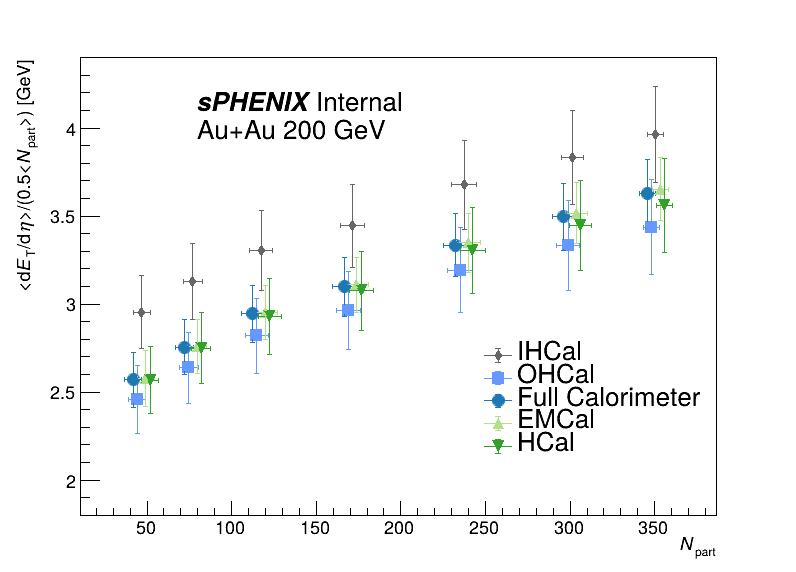

In [198]:
# Create a canvas
canvas = ROOT.TCanvas("canvas", "", 800, 600)

# Create and plot TGraphs for each array
graphs = []
totalgraph1 = []
totalgraph2 = []
topgraphs = []

#colors = [ROOT.kGray+3, ROOT.kSpring-7, ROOT.kAzure+7, ROOT.kBlue-3, ROOT.kPink-6] #, ROOT.kMagenta, ROOT.kYellow, ROOT.kBlack, ROOT.kGray]
#error_colors = [ROOT.kBlack, ROOT.kSpring-4, ROOT.kCyan-10, ROOT.kBlue-10, ROOT.kRed-10]
shapes = [ROOT.kFullDiamond, ROOT.kFullSquare, ROOT.kFullCircle, 22, 23]
for i, arr in enumerate(arrays_npart):
    graphs.append(ROOT.TGraphErrors(7, Nparts[i], arr, Npart_error_array, error_arrays_npart[i]))
    topgraphs.append(ROOT.TGraphErrors(7, Nparts[i], arr, 0, arrays_npart_stat[i]))
    totalgraph1.append(ROOT.TGraphErrors(7, Nparts[i], upper_error_arrays[i], 0, 0))
    totalgraph2.append(ROOT.TGraphErrors(7, Nparts[i], lower_error_arrays[i], 0, 0))
    graphs[i].SetMarkerStyle(shapes[i])
    graphs[i].SetLineColor(colors[i])
    graphs[i].SetFillColorAlpha(error_colors[i],0.4)
    graphs[i].SetMarkerColor(colors[i])
    graphs[i].GetYaxis().SetRangeUser(1.8,4.4)
    topgraphs[i].SetMarkerStyle(shapes[i])
    topgraphs[i].SetLineColor(colors[i])
    topgraphs[i].SetMarkerColor(colors[i])
    topgraphs[i].GetYaxis().SetRangeUser(1.8,4.4)
    totalgraph1[i].SetMarkerStyle(ROOT.kFullCircle)
    totalgraph1[i].SetLineColor(colors[i])
    totalgraph1[i].SetMarkerColor(colors[i])
    totalgraph1[i].GetYaxis().SetRangeUser(1.8,4.4)
    totalgraph2[i].SetMarkerStyle(ROOT.kFullCircle)
    totalgraph2[i].SetLineColor(colors[i])
    totalgraph2[i].SetMarkerColor(colors[i])
    totalgraph2[i].GetYaxis().SetRangeUser(1.8,4.4)
    graphs[i].SetMarkerSize(1.5)
    totalgraph1[i].SetLineWidth(2)
    totalgraph2[i].SetLineWidth(2)
    totalgraph1[i].SetLineStyle(2)
    totalgraph2[i].SetLineStyle(2)
    if i == 0:
        graphs[i].SetTitle("")
        topgraphs[i].SetTitle("")
        topgraphs[i].SetMarkerSize(1)
        totalgraph1[i].SetMarkerSize(1)
        totalgraph2[i].SetMarkerSize(1)
        graphs[i].GetYaxis().SetTitle("<d#it{E}_{T}/d#it{#eta}>/(0.5<#it{N}_{part}>) [GeV]")
        graphs[i].GetXaxis().SetTitle("#it{N}_{part}")
        graphs[i].Draw("A1P")
        #totalgraph1[i].Draw("L,same")
        #totalgraph2[i].Draw("L,same")
    else:
        #if i == 0:
        #    continue
        graphs[i].Draw("1P,same")
        #totalgraph1[i].Draw("L,same")
        #totalgraph2[i].Draw("L,same")

for i, graph in enumerate(graphs):
    topgraphs[i].SetMarkerSize(1.2)
    topgraphs[i].Draw("P,same")

# Set the legend
legend = ROOT.TLegend(0.6, 0.2, 0.8, 0.4)
legend.SetBorderSize(0)
legend.SetTextSize(0.05)
for i, graph in enumerate(graphs):
    legend.AddEntry(graph,leg_tags[i], "pel")
legend.Draw()

text = ROOT.TLatex()
text.SetTextSize(0.05)
text.SetTextAlign(12)  # Center alignment
text.SetTextColor(ROOT.kBlack)
text.DrawLatex(80, 4.15, "#it{sPHENIX}#bf{Internal}")

text2 = ROOT.TLatex()
text2.SetTextSize(0.05)
text2.SetTextAlign(12)  # Center alignment
text2.SetTextColor(ROOT.kBlack)
text2.DrawLatex(80, 4.0, "#bf{Au+Au 200 GeV}")

# Draw the canvas
canvas.Draw()
canvas.SaveAs("/sphenix/u/egm2153/"+direct+"/dETdeta_Npart_vs_Npart_all_calo_layers.png")

In [16]:
sn = array('f', comp.star_detdeta_npart)
pn = array('f', comp.phenix_detdeta_npart)
sne = array('f', comp.star_detdeta_npart_total_error)
pne = array('f', comp.phenix_detdeta_npart_total_error)
snpart = array('f', comp.star_npart)
pnpart = array('f', comp.phenix_npart)
snparterror = array('f', comp.star_npart_error)
pnparterror = array('f', comp.phenix_npart_error)
supper = array('f', comp.star_upper_error)
slower = array('f', comp.star_lower_error)
pupper = array('f', comp.phenix_upper_error)
plower = array('f', comp.phenix_lower_error)

comp_detdeta = [sn, pn, cnh]
comp_detdeta_error = [sne, pne, cnhte]
comp_npart = [snpart, pnpart, Npartarray]
comp_npart_error = [snparterror, pnparterror, Npart_error_array]
comp_npart_upper = [supper, pupper, upper_cnhe]
comp_npart_lower = [slower, plower, lower_cnhe]

#print(comp_detdeta[1][0],comp_detdeta[2][0])
#print(comp_npart_upper[1][0],comp_npart_upper[2][0])
print((comp_npart_upper[1][0]-comp_detdeta[1][0])/comp_detdeta[1][0])
print((comp_npart_upper[2][0]-comp_detdeta[2][0])/comp_detdeta[2][0])
print((comp_npart_upper[1][0]-comp_detdeta[1][0]))
print((comp_npart_upper[2][0]-comp_detdeta[2][0]))

0.058650968982722484
0.055860607030590086
0.19999980926513672
0.2025432586669922


In [200]:
# Create a canvas
canvas = ROOT.TCanvas("canvas29", "Graphs", 800, 600)
canvas.SetBottomMargin(0.15)
canvas.SetLeftMargin(0.15)
comp_leg_tags = ["STAR 0 < #kern[-0.8]{#eta} < 1","PHENIX |#eta| < 0.35","sPHENIX |#eta| < 1.1"]
# Create and plot TGraphs for each array
graphs = []
totalgraph1 = []
totalgraph2 = []
topgraphs = []
#colors = [ROOT.kGray+2, ROOT.kAzure+1, ROOT.kRed+1, ROOT.kBlue-3, ROOT.kPink-6] #, ROOT.kMagenta, ROOT.kYellow, ROOT.kBlack, ROOT.kGray]
#error_colors = [ROOT.kGray+1, ROOT.kAzure+1, ROOT.kRed-4, ROOT.kBlue-10, ROOT.kRed-10]
c_ind = [0,1,6]
shapes = [23, ROOT.kFullCircle, 22, 23]

for i, arr in enumerate(comp_detdeta):
    graphs.append(ROOT.TGraphErrors(len(comp_npart[i]), comp_npart[i], arr, comp_npart_error[i], comp_detdeta_error[i]))
    graphs[i].SetMarkerStyle(shapes[i])
    graphs[i].SetLineColor(colors[c_ind[i]])
    if i == 2:
        graphs[i].SetFillColorAlpha(error_colors[c_ind[i]],0.5)
    else:
        graphs[i].SetFillColorAlpha(error_colors[c_ind[i]],0.5)
    graphs[i].SetMarkerColor(colors[c_ind[i]])
    graphs[i].GetYaxis().SetRangeUser(2.0,4.2)
    totalgraph1.append(ROOT.TGraphErrors(len(comp_npart[i]), comp_npart[i], comp_npart_upper[i], 0, 0))
    totalgraph2.append(ROOT.TGraphErrors(len(comp_npart[i]), comp_npart[i], comp_npart_lower[i], 0, 0))
    topgraphs.append(ROOT.TGraphErrors(len(comp_npart[i]), comp_npart[i], arr, 0, 0))
    topgraphs[i].SetMarkerStyle(shapes[i])
    topgraphs[i].SetLineColor(colors[c_ind[i]])
    topgraphs[i].SetMarkerColor(colors[c_ind[i]])
    topgraphs[i].GetYaxis().SetRangeUser(2.0,4.2)
    totalgraph1[i].SetMarkerStyle(ROOT.kFullCircle)
    totalgraph1[i].SetLineColor(colors[c_ind[i]])
    totalgraph1[i].SetMarkerColor(colors[c_ind[i]])
    totalgraph1[i].GetYaxis().SetRangeUser(2.0,4.2)
    totalgraph2[i].SetMarkerStyle(ROOT.kFullCircle)
    totalgraph2[i].SetLineColor(colors[c_ind[i]])
    totalgraph2[i].SetMarkerColor(colors[c_ind[i]])
    totalgraph2[i].GetYaxis().SetRangeUser(2.0,4.2)
    graphs[i].SetMarkerSize(1.5)
    totalgraph1[i].SetLineWidth(2)
    totalgraph2[i].SetLineWidth(2)
    totalgraph1[i].SetLineStyle(1)
    totalgraph2[i].SetLineStyle(1)
    if i == 0:
        graphs[i].SetMarkerSize(1)
        graphs[i].GetYaxis().SetTitle("<d#it{E}_{T}/d#it{#eta}>/(0.5<#it{N}_{part}>) [GeV]")
        graphs[i].GetXaxis().SetTitle("#it{N}_{part}")
        graphs[i].Draw("A3")
        graphs[i].SetTitle("")
        graphs[i].GetYaxis().SetTitleSize(0.05)
        graphs[i].GetXaxis().SetTitleSize(0.05)
        graphs[i].GetYaxis().SetLabelSize(0.05)
        graphs[i].GetXaxis().SetLabelSize(0.05)
        graphs[i].GetXaxis().SetTitleOffset(1.3)
        #totalgraph1[i].Draw("L,same")
        #totalgraph2[i].Draw("L,same")
    else:
        if i == 2:
            graphs[i].Draw("5P,same")
        else:
            graphs[i].Draw("3,same")
        #totalgraph1[i].Draw("L,same")
        #totalgraph2[i].Draw("L,same")

for i, graph in enumerate(graphs):
    if i == 2:
        topgraphs[i].SetMarkerSize(1.2)
        topgraphs[i].Draw("P,same")
        
# Set the legend
legend = ROOT.TLegend(0.5, 0.2, 0.8, 0.4)
legend.SetBorderSize(0)
legend.SetTextSize(0.045)
for i in range(len(graphs)-1,-1,-1):
    if i == 2:
        legend.AddEntry(graphs[i],comp_leg_tags[i], "pf")
    else: 
        legend.AddEntry(graphs[i],comp_leg_tags[i], "f")
legend.Draw()


text = ROOT.TLatex()
text.SetTextSize(0.05)
text.SetTextAlign(12)  # Center alignment
text.SetTextColor(ROOT.kBlack)
text.DrawLatex(60, 4.0, "#it{sPHENIX}#bf{Internal}")

text2 = ROOT.TLatex()
text2.SetTextSize(0.05)
text2.SetTextAlign(12)  # Center alignment
text2.SetTextColor(ROOT.kBlack)
text2.DrawLatex(60, 3.85, "#bf{Au+Au 200 GeV}")

canvas.Update()
# Draw the canvas
canvas.Draw()
#canvas.SaveAs("/sphenix/u/egm2153/"+direct+"/dETdeta_Npart_vs_Npart_detector_comp_rw_epos.png")

In [201]:
# Create a canvas
canvas = ROOT.TCanvas("canvas18", "Graphs", 800, 600)
canvas.SetBottomMargin(0.15)
canvas.SetLeftMargin(0.15)
comp_leg_tags = ["sPHENIX |#eta| < 1.1","EPOS","AMPT","HIJING"]
# Create and plot TGraphs for each array
graphs = []
#colors = [ROOT.kGray+2, ROOT.kAzure+1, ROOT.kRed+1, ROOT.kBlue-3, ROOT.kPink-6] #, ROOT.kMagenta, ROOT.kYellow, ROOT.kBlack, ROOT.kGray]
#error_colors = [ROOT.kGray+1, ROOT.kAzure+1, ROOT.kRed-4, ROOT.kBlue-10, ROOT.kRed-10]
c_ind = [6,0,1,4] #6,0,1,8]
l_ind = [1,2,9]
shapes = [23, ROOT.kFullCircle, 22, 23]

graphs.append(ROOT.TGraphErrors(len(comp_npart[2]), comp_npart[2], comp_detdeta[2], comp_npart_error[2], comp_detdeta_error[2]))
graphs[0].SetMarkerStyle(shapes[0])
graphs[0].SetLineColor(colors[c_ind[0]])
graphs[0].SetFillColorAlpha(error_colors[c_ind[0]],0.5)
graphs[0].SetMarkerColor(colors[c_ind[0]])
graphs[0].GetYaxis().SetRangeUser(2.0,4.2)
graphs[0].SetMarkerSize(1)
graphs[0].GetYaxis().SetTitle("<d#it{E}_{T}/d#it{#eta}>/(0.5<#it{N}_{part}>) [GeV]")
graphs[0].GetXaxis().SetTitle("#it{N}_{part}")
graphs[0].Draw("A5P")
graphs[0].SetTitle("")
graphs[0].GetYaxis().SetTitleSize(0.05)
graphs[0].GetXaxis().SetTitleSize(0.05)
graphs[0].GetYaxis().SetLabelSize(0.05)
graphs[0].GetXaxis().SetLabelSize(0.05)
graphs[0].GetXaxis().SetTitleOffset(1.3)

for i, arr in enumerate(truth_arrays_npart):
    graphs.append(ROOT.TGraph(len(truth_npart_array[i]), truth_npart_array[i], arr))
    graphs[i+1].SetLineWidth(3)
    graphs[i+1].SetLineStyle(l_ind[i])
    graphs[i+1].SetLineColor(colors[c_ind[i+1]])
    graphs[i+1].GetYaxis().SetRangeUser(2.0,4.2)
    graphs[i+1].Draw("L,same")
        
# Set the legend
legend = ROOT.TLegend(0.5, 0.2, 0.8, 0.4)
legend.SetBorderSize(0)
legend.SetTextSize(0.045)
for i in range(len(graphs)):
    if i == 0:
        legend.AddEntry(graphs[i],comp_leg_tags[i], "pf")
    else: 
        legend.AddEntry(graphs[i],comp_leg_tags[i], "l")
legend.Draw()


text = ROOT.TLatex()
text.SetTextSize(0.05)
text.SetTextAlign(12)  # Center alignment
text.SetTextColor(ROOT.kBlack)
text.DrawLatex(60, 4.0, "#it{sPHENIX}#bf{Internal}")

text2 = ROOT.TLatex()
text2.SetTextSize(0.05)
text2.SetTextAlign(12)  # Center alignment
text2.SetTextColor(ROOT.kBlack)
text2.DrawLatex(60, 3.85, "#bf{Au+Au 200 GeV}")

canvas.Update()
# Draw the canvas
canvas.Draw()
canvas.SaveAs("/sphenix/u/egm2153/"+direct+"/dETdeta_Npart_vs_Npart_generator_comp.png")

Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/dETdeta_Npart_vs_Npart_generator_comp.png has been created


Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/dETdeta_Npart_vs_Npart_detector_comp_rw_epos.png has been created


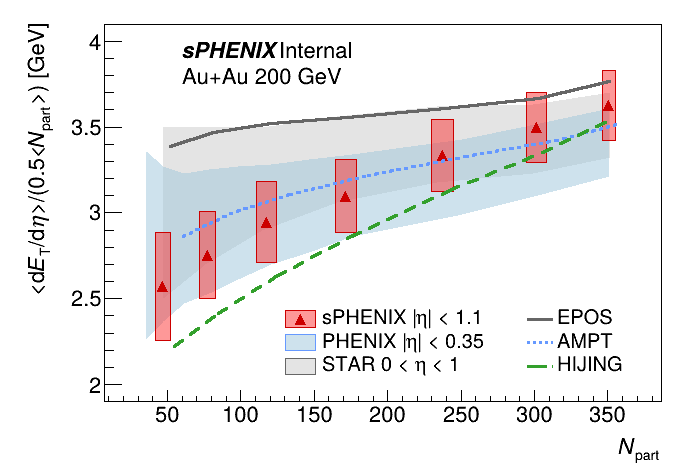

In [38]:
# Create a canvas
canvas = ROOT.TCanvas("canvas39", "Graphs", 700, 500)
canvas.SetRightMargin(0.05)
canvas.SetTopMargin(0.05)
canvas.SetBottomMargin(0.15)
canvas.SetLeftMargin(0.15)
comp_leg_tags = ["STAR 0 < #kern[-0.8]{#eta} < 1","PHENIX |#eta| < 0.35","sPHENIX |#eta| < 1.1","EPOS","AMPT","HIJING"]
# Create and plot TGraphs for each array
graphs = []
totalgraph1 = []
totalgraph2 = []
topgraphs = []
#colors = [ROOT.kGray+2, ROOT.kAzure+1, ROOT.kRed+1, ROOT.kBlue-3, ROOT.kPink-6] #, ROOT.kMagenta, ROOT.kYellow, ROOT.kBlack, ROOT.kGray]
#error_colors = [ROOT.kGray+1, ROOT.kAzure+1, ROOT.kRed-4, ROOT.kBlue-10, ROOT.kRed-10]
c_ind = [0,1,6,0,1,4]
l_ind = [1,2,9]
shapes = [23, ROOT.kFullCircle, 22, 23]

for i, arr in enumerate(comp_detdeta):
    graphs.append(ROOT.TGraphErrors(len(comp_npart[i]), comp_npart[i], arr, comp_npart_error[i], comp_detdeta_error[i]))
    graphs[i].SetMarkerStyle(shapes[i])
    graphs[i].SetLineColor(colors[c_ind[i]])
    if i == 2:
        graphs[i].SetFillColorAlpha(error_colors[c_ind[i]],0.5)
    else:
        graphs[i].SetFillColorAlpha(error_colors[c_ind[i]],0.5)
    graphs[i].SetMarkerColor(colors[c_ind[i]])
    graphs[i].GetYaxis().SetRangeUser(1.9,4.1)
    totalgraph1.append(ROOT.TGraphErrors(len(comp_npart[i]), comp_npart[i], comp_npart_upper[i], 0, 0))
    totalgraph2.append(ROOT.TGraphErrors(len(comp_npart[i]), comp_npart[i], comp_npart_lower[i], 0, 0))
    topgraphs.append(ROOT.TGraphErrors(len(comp_npart[i]), comp_npart[i], arr, 0, 0))
    topgraphs[i].SetMarkerStyle(shapes[i])
    topgraphs[i].SetLineColor(colors[c_ind[i]])
    topgraphs[i].SetMarkerColor(colors[c_ind[i]])
    topgraphs[i].GetYaxis().SetRangeUser(1.9,4.1)
    totalgraph1[i].SetMarkerStyle(ROOT.kFullCircle)
    totalgraph1[i].SetLineColor(colors[c_ind[i]])
    totalgraph1[i].SetMarkerColor(colors[c_ind[i]])
    totalgraph1[i].GetYaxis().SetRangeUser(1.9,4.1)
    totalgraph2[i].SetMarkerStyle(ROOT.kFullCircle)
    totalgraph2[i].SetLineColor(colors[c_ind[i]])
    totalgraph2[i].SetMarkerColor(colors[c_ind[i]])
    totalgraph2[i].GetYaxis().SetRangeUser(1.9,4.1)
    graphs[i].SetMarkerSize(1.5)
    totalgraph1[i].SetLineWidth(2)
    totalgraph2[i].SetLineWidth(2)
    totalgraph1[i].SetLineStyle(1)
    totalgraph2[i].SetLineStyle(1)
    if i == 0:
        graphs[i].SetMarkerSize(1)
        graphs[i].GetYaxis().SetTitle("<d#it{E}_{T}/d#it{#eta}>/(0.5<#it{N}_{part}>) [GeV]")
        graphs[i].GetXaxis().SetTitle("#it{N}_{part}")
        graphs[i].Draw("A3")
        graphs[i].SetTitle("")
        graphs[i].GetYaxis().SetTitleSize(0.05)
        graphs[i].GetXaxis().SetTitleSize(0.05)
        graphs[i].GetYaxis().SetLabelSize(0.05)
        graphs[i].GetXaxis().SetLabelSize(0.05)
        graphs[i].GetXaxis().SetTitleOffset(1.3)
        #totalgraph1[i].Draw("L,same")
        #totalgraph2[i].Draw("L,same")
    else:
        if i == 2:
            graphs[i].Draw("5P,same")
        else:
            graphs[i].Draw("3,same")
        #totalgraph1[i].Draw("L,same")
        #totalgraph2[i].Draw("L,same")

for i, graph in enumerate(graphs):
    if i == 2:
        topgraphs[i].SetMarkerSize(1.2)
        topgraphs[i].Draw("P,same")
        

for i, arr in enumerate(truth_arrays_npart):
    graphs.append(ROOT.TGraph(len(truth_npart_array[i]), truth_npart_array[i], arr))
    graphs[i+3].SetLineWidth(3)
    graphs[i+3].SetLineStyle(l_ind[i])
    graphs[i+3].SetLineColor(colors[c_ind[i+3]])
    graphs[i+3].GetYaxis().SetRangeUser(2.0,4.2)
    graphs[i+3].Draw("L,same")
        
# Set the legend
legend = ROOT.TLegend(0.4, 0.2, 0.65, 0.35)
legend.SetBorderSize(0)
legend.SetTextSize(0.045)
for i in range(2,-1,-1):
    if i == 2:
        legend.AddEntry(graphs[i],comp_leg_tags[i], "pf")
    else: 
        legend.AddEntry(graphs[i],comp_leg_tags[i], "f")
legend.Draw()

legend1 = ROOT.TLegend(0.75, 0.2, 0.95, 0.35)
legend1.SetBorderSize(0)
legend1.SetTextSize(0.045)
for i in range(3,len(graphs)):
    legend1.AddEntry(graphs[i],comp_leg_tags[i], "l")
legend1.Draw()


text = ROOT.TLatex()
text.SetTextSize(0.05)
text.SetTextAlign(12)  # Center alignment
text.SetTextColor(ROOT.kBlack)
text.DrawLatex(60, 3.95, "#it{sPHENIX}#bf{Internal}")

text2 = ROOT.TLatex()
text2.SetTextSize(0.05)
text2.SetTextAlign(12)  # Center alignment
text2.SetTextColor(ROOT.kBlack)
text2.DrawLatex(60, 3.8, "#bf{Au+Au 200 GeV}")

canvas.Update()
# Draw the canvas
canvas.Draw()
canvas.SaveAs("/sphenix/u/egm2153/"+direct+"/dETdeta_Npart_vs_Npart_detector_comp_rw_epos.png")

In [18]:
starmean = [620, 515, 402, 279, 187, 118, 70]
phenixmean = [599, 498.7, 367.8, 248.5, 162.7, 101.1, 58.6]
staruncert = [33, 28, 21, 15, 10, 6, 4]
phenixuncert = [24.7, 28.9, 23.1, 17.5, 13.5, 9.8, 7.4]

In [19]:
starline = []
starbox = []
phenixline = []
phenixbox = []

In [20]:
rebin = 4
for j in range(len(emcal_detdeta)):
    emcal_detdeta[j].Rebin(rebin)
    ihcal_detdeta[j].Rebin(rebin)
    ohcal_detdeta[j].Rebin(rebin)
    calo_detdeta[j].Rebin(rebin)
    hcal_detdeta[j].Rebin(rebin)
    emcal_detdeta[j].Scale(1.0/rebin)
    ihcal_detdeta[j].Scale(1.0/rebin)
    ohcal_detdeta[j].Scale(1.0/rebin)
    calo_detdeta[j].Scale(1.0/rebin)
    hcal_detdeta[j].Scale(1.0/rebin)
    emcal_unc[j].Rebin(rebin)
    ihcal_unc[j].Rebin(rebin)
    ohcal_unc[j].Rebin(rebin)
    calo_unc[j].Rebin(rebin)
    hcal_unc[j].Rebin(rebin)
    emcal_unc[j].Scale(1.0/rebin)
    ihcal_unc[j].Scale(1.0/rebin)
    ohcal_unc[j].Scale(1.0/rebin)
    calo_unc[j].Scale(1.0/rebin)
    hcal_unc[j].Scale(1.0/rebin)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/emcal_hcal_star_phenix_detdeta_0_5.png has been created


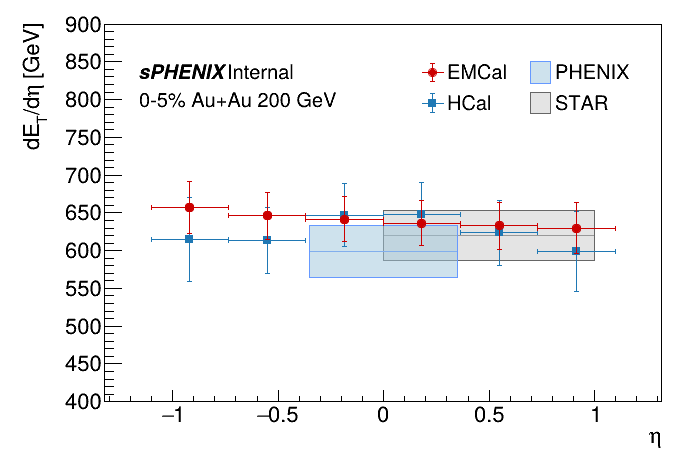

In [36]:
emcal_detdeta_errors = []
for j in range(len(emcal_detdeta)):
    graph = ROOT.TGraphErrors()
    for i in range(1, emcal_detdeta[j].GetNbinsX() + 1):
        error = emcal_unc[j].GetBinContent(i)
        x = emcal_detdeta[j].GetBinCenter(i)
        y = emcal_detdeta[j].GetBinContent(i)
        bin_width = emcal_detdeta[j].GetBinWidth(i)
        graph.SetPoint(i - 1, x, y)
        graph.SetPointError(i - 1, bin_width / 2, error)
    emcal_detdeta_errors.append(graph)
    
hcal_detdeta_errors = []
for j in range(len(hcal_detdeta)):
    graph = ROOT.TGraphErrors()
    for i in range(1, hcal_detdeta[j].GetNbinsX() + 1):
        error = hcal_unc[j].GetBinContent(i)
        x = hcal_detdeta[j].GetBinCenter(i)
        y = hcal_detdeta[j].GetBinContent(i)
        bin_width = hcal_detdeta[j].GetBinWidth(i)
        graph.SetPoint(i - 1, x, y)
        graph.SetPointError(i - 1, bin_width / 2, error)
    hcal_detdeta_errors.append(graph)

canvas = TCanvas("canvas", "", 700, 500)
leg = ROOT.TLegend(.6, .75, .94, .88)
leg.SetTextSize(0.045)
leg.SetBorderSize(0)
leg.SetNColumns(2)
canvas.SetRightMargin(0.05)
canvas.SetTopMargin(0.05)
canvas.SetBottomMargin(0.15)
canvas.SetLeftMargin(0.15)

starline = []
starbox = []
phnxline = []
phnxbox = []

for i in range(len(emcal_detdeta)):
    emcal_detdeta[i].SetLineColor(colors[6])
    emcal_detdeta[i].SetLineWidth(0)
    emcal_detdeta[i].SetMarkerStyle(20)
    emcal_detdeta[i].SetMarkerColor(colors[6])
    emcal_detdeta_errors[i].SetMarkerColor(colors[6])
    emcal_detdeta_errors[i].SetMarkerStyle(20)
    emcal_detdeta_errors[i].SetLineWidth(1)
    emcal_detdeta_errors[i].SetLineColor(colors[6])
    emcal_detdeta_errors[i].SetFillColorAlpha(error_colors[6], 0.2)
    emcal_detdeta_errors[i].SetDrawOption("P E1");
    
    hcal_detdeta[i].SetLineColor(colors[2])
    hcal_detdeta[i].SetLineWidth(0)
    hcal_detdeta[i].SetMarkerStyle(21)
    hcal_detdeta[i].SetMarkerColor(colors[2])
    hcal_detdeta_errors[i].SetMarkerColor(colors[2])
    hcal_detdeta_errors[i].SetMarkerStyle(21)
    hcal_detdeta_errors[i].SetLineWidth(1)
    hcal_detdeta_errors[i].SetLineColor(colors[2])
    hcal_detdeta_errors[i].SetFillColorAlpha(error_colors[2], 0.2)
    emcal_detdeta_errors[i].SetLineWidth(1)
    hcal_detdeta_errors[i].SetLineWidth(1)
    hcal_detdeta_errors[i].SetDrawOption("P E1");
    
    starline.append(ROOT.TLine(0,comp.star_detdeta[i],1,comp.star_detdeta[i]))
    phnxline.append(ROOT.TLine(-0.35,comp.phenix_detdeta[i],0.35,comp.phenix_detdeta[i]))
    starbox.append(ROOT.TBox(0,comp.star_detdeta[i]-comp.star_detdeta_error[i],1,comp.star_detdeta[i]+comp.star_detdeta_error[i]))
    phnxbox.append(ROOT.TBox(-0.35,comp.phenix_detdeta[i]-comp.phenix_detdeta_error[i],0.35,comp.phenix_detdeta[i]+comp.phenix_detdeta_error[i]))
    phnxline[i].SetLineColor(colors[1])
    phnxbox[i].SetFillColorAlpha(error_colors[1],0.5)
    phnxbox[i].SetLineColor(colors[1])
    phnxbox[i].SetLineWidth(1)
    starline[i].SetLineColor(colors[0])
    starbox[i].SetFillColorAlpha(error_colors[0],0.5)
    starbox[i].SetLineWidth(1)
    starbox[i].SetLineColor(colors[0])
    
    if i == 0:
        hcal_detdeta_errors[i].GetYaxis().SetRangeUser(400, 900)
        hcal_detdeta_errors[i].GetYaxis().SetTitle("dE_{T}/d#eta [GeV]")
        hcal_detdeta_errors[i].GetXaxis().SetTitle("#eta")
        hcal_detdeta_errors[i].GetYaxis().SetTitleSize(0.05)
        hcal_detdeta_errors[i].GetXaxis().SetTitleSize(0.05)
        hcal_detdeta_errors[i].GetXaxis().SetLabelSize(0.05)
        hcal_detdeta_errors[i].GetYaxis().SetLabelSize(0.05)
        
        hcal_detdeta_errors[i].Draw("APE1")
        hcal_detdeta[i].Draw("PE1 same")
        emcal_detdeta_errors[i].Draw("PE1")
        emcal_detdeta[i].Draw("PE1 same")
        starline[i].Draw()
        starbox[i].Draw("l")
        phnxline[i].Draw()
        phnxbox[i].Draw("l")
        hcal_detdeta_errors[i].Draw("PE1 same")
        hcal_detdeta[i].Draw("PE1 same")
        emcal_detdeta_errors[i].Draw("PE1 same")
        emcal_detdeta[i].Draw("PE1 same")
        leg.AddEntry(emcal_detdeta_errors[i],"EMCal","pel")
        leg.AddEntry(phnxbox[i],"PHENIX","f")
        leg.AddEntry(hcal_detdeta_errors[i],"HCal","pel")
        leg.AddEntry(starbox[i],"STAR","f")

text = ROOT.TLatex()
text.SetTextSize(0.045)
text.SetTextAlign(12)  # Center alignment
text.SetTextColor(ROOT.kBlack)
text.DrawLatexNDC(0.2, 0.85, "#it{sPHENIX}#bf{Internal}")

text2 = ROOT.TLatex()
text2.SetTextSize(0.045)
text2.SetTextAlign(12)  # Center alignment
text2.SetTextColor(ROOT.kBlack)
text2.DrawLatexNDC(0.2, 0.79, "#bf{0-5% Au+Au 200 GeV}")

leg.Draw()
canvas.SetLogy(0)
canvas.Draw()
canvas.SaveAs("/sphenix/u/egm2153/"+direct+"/emcal_hcal_star_phenix_detdeta_0_5.png")

In [207]:
calo_detdeta_errors = []
for j in range(len(calo_detdeta)):
    graph = ROOT.TGraphErrors()
    for i in range(1, calo_detdeta[j].GetNbinsX() + 1):
        error = calo_unc[j].GetBinContent(i)
        x = calo_detdeta[j].GetBinCenter(i)
        y = calo_detdeta[j].GetBinContent(i)
        bin_width = calo_detdeta[j].GetBinWidth(i)
        graph.SetPoint(i - 1, x, y)
        graph.SetPointError(i - 1, bin_width / 2, error)
    calo_detdeta_errors.append(graph)

In [208]:
blank = TH1F("blank","",200,-2.0,2.0)

Warning in <TROOT::Append>: Replacing existing TH1: blank (Potential memory leak).


In [209]:
# Create the main canvas
canvas = ROOT.TCanvas("canvas1011", "", 1400, 600)
canvas.Divide(3, 1)  # Divide the canvas into 3 pads

for i in range(1, 4):
    pad = canvas.cd(i)
    pad.SetLeftMargin(0.14)  # Increase margin to add more space on the left
    pad.SetRightMargin(0.05)  # Adjust right margin if needed
    pad.SetBottomMargin(0.12)  # Adjust bottom margin if needed
    pad.SetTopMargin(0.05)  # Adjust top margin if needed
    
# Create legends for each pad
leg1 = ROOT.TLegend(.6, .87, .94, .9)
leg1.SetTextSize(0.038)
leg2 = ROOT.TLegend(.6, .87, .94, .9)
leg2.SetTextSize(0.038)
leg3 = ROOT.TLegend(.6, .87, .94, .9)
leg3.SetTextSize(0.038)

for i in range(len(calo_detdeta)):
    calo_detdeta[i].SetLineColor(colors[6])
    calo_detdeta_errors[i].SetLineColor(colors[6])
    calo_detdeta[i].SetMarkerColor(colors[6])
    calo_detdeta_errors[i].SetMarkerColor(colors[6])
    calo_detdeta[i].SetMarkerStyle(22)
    calo_detdeta_errors[i].SetMarkerStyle(22)
    calo_detdeta[i].SetLineWidth(0)
    calo_detdeta_errors[i].SetLineWidth(1)
    calo_detdeta_errors[i].SetFillColorAlpha(error_colors[6], 0.5)
    calo_detdeta[i].SetMarkerSize(1)
    calo_detdeta_errors[i].SetMarkerSize(1)
    calo_detdeta_errors[i].SetDrawOption("P E5")
    
    emcal_detdeta[i].SetLineColor(colors[0])
    emcal_detdeta_errors[i].SetLineColor(colors[0])
    emcal_detdeta[i].SetMarkerColor(colors[0])
    emcal_detdeta_errors[i].SetMarkerColor(colors[0])
    emcal_detdeta[i].SetMarkerStyle(20)
    emcal_detdeta_errors[i].SetMarkerStyle(20)
    emcal_detdeta[i].SetLineWidth(0)
    emcal_detdeta_errors[i].SetLineWidth(1)
    emcal_detdeta_errors[i].SetFillColorAlpha(error_colors[0], 0.5)
    emcal_detdeta[i].SetMarkerSize(1)
    emcal_detdeta_errors[i].SetMarkerSize(1)
    emcal_detdeta_errors[i].SetDrawOption("P E5")
    
    hcal_detdeta[i].SetLineColor(colors[2])
    hcal_detdeta_errors[i].SetLineColor(colors[2])
    hcal_detdeta[i].SetMarkerColor(colors[2])
    hcal_detdeta_errors[i].SetMarkerColor(colors[2])
    hcal_detdeta[i].SetMarkerStyle(21)
    hcal_detdeta_errors[i].SetMarkerStyle(21)
    hcal_detdeta[i].SetLineWidth(0)
    hcal_detdeta_errors[i].SetLineWidth(1)
    hcal_detdeta_errors[i].SetFillColorAlpha(error_colors[2], 0.5)
    hcal_detdeta[i].SetMarkerSize(1)
    hcal_detdeta_errors[i].SetMarkerSize(1)
    hcal_detdeta_errors[i].SetDrawOption("P E5")
    
    if i == 0:
        # Add entries to the legends
        leg1.AddEntry(emcal_detdeta_errors[i], "EMCal", "pef")
        leg2.AddEntry(hcal_detdeta_errors[i], "HCal", "pef")
        leg3.AddEntry(calo_detdeta_errors[i], "Full Calorimeter", "pef")
        leg1.SetBorderSize(0)
        leg2.SetBorderSize(0)
        leg3.SetBorderSize(0)
        
        # Configure axis titles and labels
        for hist in [emcal_detdeta_errors[i], hcal_detdeta_errors[i], calo_detdeta_errors[i]]:
            hist.GetYaxis().SetTitle("dE_{T}/d#eta [GeV]")
            hist.GetXaxis().SetTitle("#eta")
            hist.GetYaxis().SetTitleSize(0.05)
            hist.GetXaxis().SetTitleSize(0.05)
            hist.GetXaxis().SetLabelSize(0.04)
            hist.GetYaxis().SetLabelSize(0.04)
            hist.GetYaxis().SetRangeUser(40, 1300)
            hist.GetXaxis().SetRangeUser(-1.6, 1.2)

    # Draw histograms on the respective pads
    canvas.cd(1)
    if i == 0:
        emcal_detdeta_errors[i].Draw("APE5 same")
        emcal_detdeta[i].Draw("PE same")
    else:
        emcal_detdeta_errors[i].Draw("5PE same")
        emcal_detdeta[i].Draw("PE same")
        
    canvas.cd(2)
    if i == 0:
        hcal_detdeta_errors[i].Draw("AP5E same")
        hcal_detdeta[i].Draw("PE same")
    else:
        hcal_detdeta_errors[i].Draw("5PE same")
        hcal_detdeta[i].Draw("PE same")
        
    canvas.cd(3)
    if i == 0:
        calo_detdeta_errors[i].Draw("APE5 same")
        calo_detdeta[i].Draw("PE same")
    else:
        calo_detdeta_errors[i].Draw("5PE same")
        calo_detdeta[i].Draw("PE same")

# Draw legends
canvas.cd(1)
leg1.Draw()
text = ROOT.TLatex()
text.SetTextSize(0.038)
text.SetTextAlign(12)  # Center alignment
text.SetTextColor(ROOT.kBlack)
text.DrawLatexNDC(0.24, 0.9, "#it{sPHENIX}#bf{Internal}")

text2 = ROOT.TLatex()
text2.SetTextSize(0.038)
text2.SetTextAlign(12)  # Center alignment
text2.SetTextColor(ROOT.kBlack)
text2.DrawLatexNDC(0.24, 0.87, "#bf{Au+Au 200 GeV}")

text3 = ROOT.TLatex()
text3.SetTextSize(0.03)
text3.SetTextAlign(12)  # Center alignment
text3.SetTextColor(ROOT.kBlack)
text3.DrawLatexNDC(0.175, 0.812, "0-5%")

text4 = ROOT.TLatex()
text4.SetTextSize(0.03)
text4.SetTextAlign(12)  # Center alignment
text4.SetTextColor(ROOT.kBlack)
text4.DrawLatexNDC(0.175, 0.715, "5-10%")

text5 = ROOT.TLatex()
text5.SetTextSize(0.03)
text5.SetTextAlign(12)  # Center alignment
text5.SetTextColor(ROOT.kBlack)
text5.DrawLatexNDC(0.175, 0.648, "10-20%")

text6 = ROOT.TLatex()
text6.SetTextSize(0.03)
text6.SetTextAlign(12)  # Center alignment
text6.SetTextColor(ROOT.kBlack)
text6.DrawLatexNDC(0.175, 0.553, "20-30%")

text7 = ROOT.TLatex()
text7.SetTextSize(0.03)
text7.SetTextAlign(12)  # Center alignment
text7.SetTextColor(ROOT.kBlack)
text7.DrawLatexNDC(0.175, 0.448, "30-40%")

text7 = ROOT.TLatex()
text7.SetTextSize(0.03)
text7.SetTextAlign(12)  # Center alignment
text7.SetTextColor(ROOT.kBlack)
text7.DrawLatexNDC(0.175, 0.331, "40-50%")

text7 = ROOT.TLatex()
text7.SetTextSize(0.03)
text7.SetTextAlign(12)  # Center alignment
text7.SetTextColor(ROOT.kBlack)
text7.DrawLatexNDC(0.175, 0.195, "50-60%")
canvas.cd(2)
leg2.Draw()
te = ROOT.TLatex()
te.SetTextSize(0.038)
te.SetTextAlign(12)  # Center alignment
te.SetTextColor(ROOT.kBlack)
te.DrawLatexNDC(0.24, 0.9, "#it{sPHENIX}#bf{Internal}")

te2 = ROOT.TLatex()
te2.SetTextSize(0.038)
te2.SetTextAlign(12)  # Center alignment
te2.SetTextColor(ROOT.kBlack)
te2.DrawLatexNDC(0.24, 0.87, "#bf{Au+Au 200 GeV}")

te3 = ROOT.TLatex()
te3.SetTextSize(0.03)
te3.SetTextAlign(12)  # Center alignment
te3.SetTextColor(ROOT.kBlack)
te3.DrawLatexNDC(0.175, 0.808, "0-5%")

te4 = ROOT.TLatex()
te4.SetTextSize(0.03)
te4.SetTextAlign(12)  # Center alignment
te4.SetTextColor(ROOT.kBlack)
te4.DrawLatexNDC(0.175, 0.695, "5-10%")

te5 = ROOT.TLatex()
te5.SetTextSize(0.03)
te5.SetTextAlign(12)  # Center alignment
te5.SetTextColor(ROOT.kBlack)
te5.DrawLatexNDC(0.175, 0.628, "10-20%")

te6 = ROOT.TLatex()
te6.SetTextSize(0.03)
te6.SetTextAlign(12)  # Center alignment
te6.SetTextColor(ROOT.kBlack)
te6.DrawLatexNDC(0.175, 0.533, "20-30%")

te7 = ROOT.TLatex()
te7.SetTextSize(0.03)
te7.SetTextAlign(12)  # Center alignment
te7.SetTextColor(ROOT.kBlack)
te7.DrawLatexNDC(0.175, 0.428, "30-40%")

te7 = ROOT.TLatex()
te7.SetTextSize(0.03)
te7.SetTextAlign(12)  # Center alignment
te7.SetTextColor(ROOT.kBlack)
te7.DrawLatexNDC(0.175, 0.311, "40-50%")

te7 = ROOT.TLatex()
te7.SetTextSize(0.03)
te7.SetTextAlign(12)  # Center alignment
te7.SetTextColor(ROOT.kBlack)
te7.DrawLatexNDC(0.175, 0.173, "50-60%")
canvas.cd(3)
leg3.Draw()
tex = ROOT.TLatex()
tex.SetTextSize(0.038)
tex.SetTextAlign(12)  # Center alignment
tex.SetTextColor(ROOT.kBlack)
tex.DrawLatexNDC(0.24, 0.9, "#it{sPHENIX}#bf{Internal}")

tex2 = ROOT.TLatex()
tex2.SetTextSize(0.038)
tex2.SetTextAlign(12)  # Center alignment
tex2.SetTextColor(ROOT.kBlack)
tex2.DrawLatexNDC(0.24, 0.87, "#bf{Au+Au 200 GeV}")

tex3 = ROOT.TLatex()
tex3.SetTextSize(0.03)
tex3.SetTextAlign(12)  # Center alignment
tex3.SetTextColor(ROOT.kBlack)
tex3.DrawLatexNDC(0.175, 0.808, "0-5%")

tex4 = ROOT.TLatex()
tex4.SetTextSize(0.03)
tex4.SetTextAlign(12)  # Center alignment
tex4.SetTextColor(ROOT.kBlack)
tex4.DrawLatexNDC(0.175, 0.71, "5-10%")

tex5 = ROOT.TLatex()
tex5.SetTextSize(0.03)
tex5.SetTextAlign(12)  # Center alignment
tex5.SetTextColor(ROOT.kBlack)
tex5.DrawLatexNDC(0.175, 0.643, "10-20%")

tex6 = ROOT.TLatex()
tex6.SetTextSize(0.03)
tex6.SetTextAlign(12)  # Center alignment
tex6.SetTextColor(ROOT.kBlack)
tex6.DrawLatexNDC(0.175, 0.548, "20-30%")

tex7 = ROOT.TLatex()
tex7.SetTextSize(0.03)
tex7.SetTextAlign(12)  # Center alignment
tex7.SetTextColor(ROOT.kBlack)
text7.DrawLatexNDC(0.175, 0.443, "30-40%")

tex7 = ROOT.TLatex()
tex7.SetTextSize(0.03)
tex7.SetTextAlign(12)  # Center alignment
tex7.SetTextColor(ROOT.kBlack)
tex7.DrawLatexNDC(0.175, 0.326, "40-50%")

tex7 = ROOT.TLatex()
tex7.SetTextSize(0.03)
tex7.SetTextAlign(12)  # Center alignment
tex7.SetTextColor(ROOT.kBlack)
tex7.DrawLatexNDC(0.175, 0.19, "50-60%")

# Set logarithmic scale
for i in range(1, 4):
    canvas.cd(i).SetLogy(1)

# Update the canvas
canvas.Update()
canvas.Draw()
canvas.SaveAs("/sphenix/u/egm2153/"+direct+"/emcal_hcal_calo_detdeta_separate.png")

Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/emcal_hcal_calo_detdeta_separate.png has been created


7 7 7


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas2020
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/flipped_emcal_hcal_full_calo_all_cent_log_separate_1.png has been created


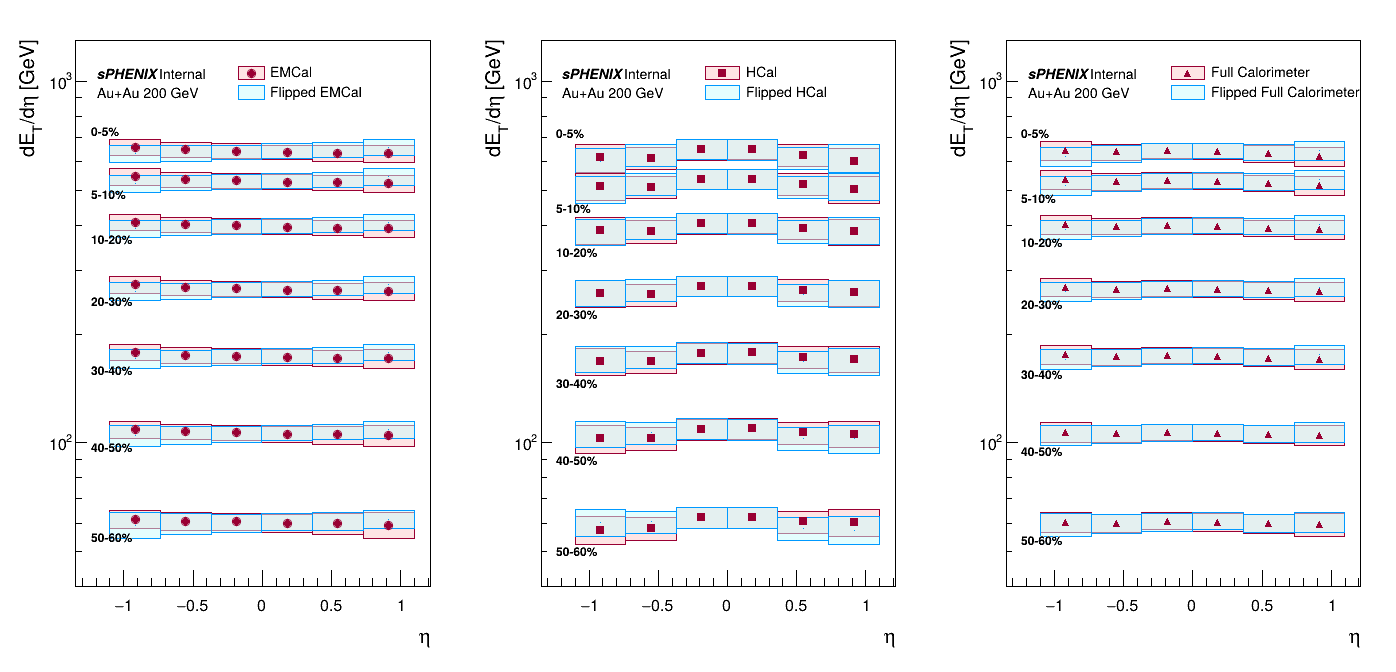

In [185]:
flip_emcal_detdeta_errors = []
flip_ohcal_detdeta_errors = []
flip_calo_detdeta_errors = []
flip_hcal_detdeta_errors = []

#for i in range(len(calo_detdeta)):
#    for j in range(1, 3):
#        calo_detdeta[i].SetBinContent(j,-1)
#        calo_detdeta[i].SetBinError(j,-1)
#        calo_unc[i].SetBinContent(j,-1)
#        calo_unc[i].SetBinError(j,-1)
#        emcal_detdeta[i].SetBinContent(j,-1)
#        emcal_detdeta[i].SetBinError(j,-1)
#        emcal_unc[i].SetBinContent(j,-1)
#        emcal_unc[i].SetBinError(j,-1)

for j in range(len(emcal_detdeta)):
    graph = ROOT.TGraphErrors()
    for i in range(1, emcal_detdeta[j].GetNbinsX() + 1):
        error = emcal_unc[j].GetBinContent(emcal_detdeta[j].GetNbinsX() + 1 - i)
        x = emcal_detdeta[j].GetBinCenter(i)
        y = emcal_detdeta[j].GetBinContent(emcal_detdeta[j].GetNbinsX() + 1 - i)
        bin_width = emcal_detdeta[j].GetBinWidth(i)
        graph.SetPoint(i - 1, x, y)
        graph.SetPointError(i - 1, bin_width / 2, error)
    flip_emcal_detdeta_errors.append(graph)
    
for j in range(len(ohcal_detdeta)):
    graph = ROOT.TGraphErrors()
    for i in range(1, ohcal_detdeta[j].GetNbinsX() + 1):
        error = ohcal_unc[j].GetBinContent(ohcal_detdeta[j].GetNbinsX() + 1 - i)
        x = ohcal_detdeta[j].GetBinCenter(i)
        y = ohcal_detdeta[j].GetBinContent(ohcal_detdeta[j].GetNbinsX() + 1 - i)
        bin_width = ohcal_detdeta[j].GetBinWidth(i)
        graph.SetPoint(i - 1, x, y)
        graph.SetPointError(i - 1, bin_width / 2, error)
    flip_ohcal_detdeta_errors.append(graph)

for j in range(len(hcal_detdeta)):
    graph = ROOT.TGraphErrors()
    for i in range(1, hcal_detdeta[j].GetNbinsX() + 1):
        error = hcal_unc[j].GetBinContent(hcal_detdeta[j].GetNbinsX() + 1 - i)
        x = hcal_detdeta[j].GetBinCenter(i)
        y = hcal_detdeta[j].GetBinContent(hcal_detdeta[j].GetNbinsX() + 1 - i)
        bin_width = hcal_detdeta[j].GetBinWidth(i)
        graph.SetPoint(i - 1, x, y)
        graph.SetPointError(i - 1, bin_width / 2, error)
    flip_hcal_detdeta_errors.append(graph)

for j in range(len(calo_detdeta)):
    graph = ROOT.TGraphErrors()
    for i in range(1, calo_detdeta[j].GetNbinsX() + 1):
        error = calo_unc[j].GetBinContent(calo_detdeta[j].GetNbinsX() + 1 - i)
        x = calo_detdeta[j].GetBinCenter(i)
        y = calo_detdeta[j].GetBinContent(calo_detdeta[j].GetNbinsX() + 1 - i)
        bin_width = calo_detdeta[j].GetBinWidth(i)
        graph.SetPoint(i - 1, x, y)
        graph.SetPointError(i - 1, bin_width / 2, error)
    flip_calo_detdeta_errors.append(graph)
print(len(flip_emcal_detdeta_errors), len(flip_hcal_detdeta_errors), len(flip_calo_detdeta_errors))
colors = [ROOT.kPink-6, ROOT.kAzure+7, ROOT.kBlue-3, ROOT.kSpring-4] # Define colors for the histograms
error_colors = [ROOT.kRed-10, ROOT.kCyan-10, ROOT.kBlue-10, ROOT.kSpring-4] # Define colors for the errors

# Create the main canvas
canvas = ROOT.TCanvas("canvas2020", "", 1400, 700)
canvas.Divide(3, 1)  # Divide the canvas into 3 pads

for i in range(1, 4):
    pad = canvas.cd(i)
    pad.SetLeftMargin(0.14)  # Increase margin to add more space on the left
    pad.SetRightMargin(0.05)  # Adjust right margin if needed
    pad.SetBottomMargin(0.12)  # Adjust bottom margin if needed
    pad.SetTopMargin(0.05)  # Adjust top margin if needed

# Create legends for each pad
leg1 = ROOT.TLegend(.5, .855, .84, .915)
leg1.SetTextSize(0.035)
leg2 = ROOT.TLegend(.5, .855, .94, .915)
leg2.SetTextSize(0.035)
leg3 = ROOT.TLegend(.5, .855, .94, .915)
leg3.SetTextSize(0.035)

for i in range(len(calo_detdeta)):
    # Setting line and marker colors for EMCal, OHCal, and Full Calorimeter histograms
    calo_detdeta[i].SetLineColor(colors[0])
    calo_detdeta_errors[i].SetLineColor(colors[0])
    calo_detdeta[i].SetMarkerColor(colors[0])
    calo_detdeta_errors[i].SetMarkerColor(colors[0])
    calo_detdeta[i].SetMarkerStyle(22)
    calo_detdeta_errors[i].SetMarkerStyle(22)
    calo_detdeta[i].SetLineWidth(0)
    calo_detdeta_errors[i].SetLineWidth(1)
    calo_detdeta_errors[i].SetFillColorAlpha(error_colors[0], 0.5)
    calo_detdeta[i].SetMarkerSize(1)
    calo_detdeta_errors[i].SetMarkerSize(1)
    
    emcal_detdeta[i].SetLineColor(colors[0])
    emcal_detdeta_errors[i].SetLineColor(colors[0])
    emcal_detdeta[i].SetMarkerColor(colors[0])
    emcal_detdeta_errors[i].SetMarkerColor(colors[0])
    emcal_detdeta[i].SetMarkerStyle(20)
    emcal_detdeta_errors[i].SetMarkerStyle(20)
    emcal_detdeta[i].SetLineWidth(0)
    emcal_detdeta_errors[i].SetLineWidth(1)
    emcal_detdeta_errors[i].SetFillColorAlpha(error_colors[0], 0.5)
    emcal_detdeta[i].SetMarkerSize(1)
    emcal_detdeta_errors[i].SetMarkerSize(1)
    
    hcal_detdeta[i].SetLineColor(colors[0])
    hcal_detdeta_errors[i].SetLineColor(colors[0])
    hcal_detdeta[i].SetMarkerColor(colors[0])
    hcal_detdeta_errors[i].SetMarkerColor(colors[0])
    hcal_detdeta[i].SetMarkerStyle(21)
    hcal_detdeta_errors[i].SetMarkerStyle(21)
    hcal_detdeta[i].SetLineWidth(0)
    hcal_detdeta_errors[i].SetLineWidth(1)
    hcal_detdeta_errors[i].SetFillColorAlpha(error_colors[0], 0.5)
    hcal_detdeta[i].SetMarkerSize(1)
    hcal_detdeta_errors[i].SetMarkerSize(1)
    
    flip_calo_detdeta_errors[i].SetMarkerColor(colors[1])
    flip_calo_detdeta_errors[i].SetLineColor(colors[1])
    flip_calo_detdeta_errors[i].SetFillColorAlpha(error_colors[1], 0.5)
    
    flip_emcal_detdeta_errors[i].SetMarkerColor(colors[1])
    flip_emcal_detdeta_errors[i].SetLineColor(colors[1])
    flip_emcal_detdeta_errors[i].SetFillColorAlpha(error_colors[1], 0.5)
    
    flip_hcal_detdeta_errors[i].SetMarkerColor(colors[1])
    flip_hcal_detdeta_errors[i].SetLineColor(colors[1])
    flip_hcal_detdeta_errors[i].SetFillColorAlpha(error_colors[1], 0.5)
    
    if i == 0:
        # Add entries to the legends
        leg1.AddEntry(emcal_detdeta_errors[i], "EMCal", "pf")
        leg2.AddEntry(hcal_detdeta_errors[i], "HCal", "pf")
        leg3.AddEntry(calo_detdeta_errors[i], "Full Calorimeter", "pf")
        leg1.AddEntry(flip_emcal_detdeta_errors[i], "Flipped EMCal", "f")
        leg2.AddEntry(flip_hcal_detdeta_errors[i], "Flipped HCal", "f")
        leg3.AddEntry(flip_calo_detdeta_errors[i], "Flipped Full Calorimeter", "f")
        leg1.SetBorderSize(0)
        leg2.SetBorderSize(0)
        leg3.SetBorderSize(0)
        
        # Configure axis titles and labels
        for hist in [emcal_detdeta_errors[i], hcal_detdeta_errors[i], calo_detdeta_errors[i]]:
            hist.GetYaxis().SetTitle("dE_{T}/d#eta [GeV]")
            hist.GetXaxis().SetTitle("#eta")
            hist.GetYaxis().SetTitleSize(0.05)
            hist.GetXaxis().SetLabelSize(0.04)
            hist.GetYaxis().SetLabelSize(0.04)
            hist.GetYaxis().SetRangeUser(40, 1300)

    # Draw histograms on the respective pads
    canvas.cd(1)
    if i == 0:
        emcal_detdeta_errors[i].Draw("A5")
        flip_emcal_detdeta_errors[i].Draw("5P same")
        emcal_detdeta[i].Draw("P same")
    else:
        emcal_detdeta_errors[i].Draw("5 same")
        flip_emcal_detdeta_errors[i].Draw("5P same")
        emcal_detdeta[i].Draw("P same")
        
    canvas.cd(2)
    if i == 0:
        hcal_detdeta_errors[i].Draw("A5")
        flip_hcal_detdeta_errors[i].Draw("5P same")
        hcal_detdeta[i].Draw("P same")
    else:
        hcal_detdeta_errors[i].Draw("5 same")
        flip_hcal_detdeta_errors[i].Draw("5P same")
        hcal_detdeta[i].Draw("P same")
        
    canvas.cd(3)
    if i == 0:
        calo_detdeta_errors[i].Draw("A5")
        flip_calo_detdeta_errors[i].Draw("5P same")
        calo_detdeta[i].Draw("P same")
    else:
        calo_detdeta_errors[i].Draw("5 same")
        flip_calo_detdeta_errors[i].Draw("5P same")
        calo_detdeta[i].Draw("P same")

# Draw legends
canvas.cd(1)
leg1.Draw()
text = ROOT.TLatex()
text.SetTextSize(0.035)
text.SetTextAlign(12)  # Center alignment
text.SetTextColor(ROOT.kBlack)
text.DrawLatexNDC(0.19, 0.9, "#it{sPHENIX}#bf{Internal}")

text2 = ROOT.TLatex()
text2.SetTextSize(0.035)
text2.SetTextAlign(12)  # Center alignment
text2.SetTextColor(ROOT.kBlack)
text2.DrawLatexNDC(0.19, 0.87, "#bf{Au+Au 200 GeV}")

text3 = ROOT.TLatex()
text3.SetTextSize(0.03)
text3.SetTextAlign(12)  # Center alignment
text3.SetTextColor(ROOT.kBlack)
text3.DrawLatexNDC(0.175, 0.812, "0-5%")

text4 = ROOT.TLatex()
text4.SetTextSize(0.03)
text4.SetTextAlign(12)  # Center alignment
text4.SetTextColor(ROOT.kBlack)
text4.DrawLatexNDC(0.175, 0.715, "5-10%")

text5 = ROOT.TLatex()
text5.SetTextSize(0.03)
text5.SetTextAlign(12)  # Center alignment
text5.SetTextColor(ROOT.kBlack)
text5.DrawLatexNDC(0.175, 0.648, "10-20%")

text6 = ROOT.TLatex()
text6.SetTextSize(0.03)
text6.SetTextAlign(12)  # Center alignment
text6.SetTextColor(ROOT.kBlack)
text6.DrawLatexNDC(0.175, 0.553, "20-30%")

text7 = ROOT.TLatex()
text7.SetTextSize(0.03)
text7.SetTextAlign(12)  # Center alignment
text7.SetTextColor(ROOT.kBlack)
text7.DrawLatexNDC(0.175, 0.448, "30-40%")

text7 = ROOT.TLatex()
text7.SetTextSize(0.03)
text7.SetTextAlign(12)  # Center alignment
text7.SetTextColor(ROOT.kBlack)
text7.DrawLatexNDC(0.175, 0.331, "40-50%")

text7 = ROOT.TLatex()
text7.SetTextSize(0.03)
text7.SetTextAlign(12)  # Center alignment
text7.SetTextColor(ROOT.kBlack)
text7.DrawLatexNDC(0.175, 0.195, "50-60%")
canvas.cd(2)
leg2.Draw()
te = ROOT.TLatex()
te.SetTextSize(0.035)
te.SetTextAlign(12)  # Center alignment
te.SetTextColor(ROOT.kBlack)
te.DrawLatexNDC(0.19, 0.9, "#it{sPHENIX}#bf{Internal}")

te2 = ROOT.TLatex()
te2.SetTextSize(0.035)
te2.SetTextAlign(12)  # Center alignment
te2.SetTextColor(ROOT.kBlack)
te2.DrawLatexNDC(0.19, 0.87, "#bf{Au+Au 200 GeV}")

te3 = ROOT.TLatex()
te3.SetTextSize(0.03)
te3.SetTextAlign(12)  # Center alignment
te3.SetTextColor(ROOT.kBlack)
te3.DrawLatexNDC(0.175, 0.808, "0-5%")

te4 = ROOT.TLatex()
te4.SetTextSize(0.03)
te4.SetTextAlign(12)  # Center alignment
te4.SetTextColor(ROOT.kBlack)
te4.DrawLatexNDC(0.175, 0.695, "5-10%")

te5 = ROOT.TLatex()
te5.SetTextSize(0.03)
te5.SetTextAlign(12)  # Center alignment
te5.SetTextColor(ROOT.kBlack)
te5.DrawLatexNDC(0.175, 0.628, "10-20%")

te6 = ROOT.TLatex()
te6.SetTextSize(0.03)
te6.SetTextAlign(12)  # Center alignment
te6.SetTextColor(ROOT.kBlack)
te6.DrawLatexNDC(0.175, 0.533, "20-30%")

te7 = ROOT.TLatex()
te7.SetTextSize(0.03)
te7.SetTextAlign(12)  # Center alignment
te7.SetTextColor(ROOT.kBlack)
te7.DrawLatexNDC(0.175, 0.428, "30-40%")

te7 = ROOT.TLatex()
te7.SetTextSize(0.03)
te7.SetTextAlign(12)  # Center alignment
te7.SetTextColor(ROOT.kBlack)
te7.DrawLatexNDC(0.175, 0.311, "40-50%")

te7 = ROOT.TLatex()
te7.SetTextSize(0.03)
te7.SetTextAlign(12)  # Center alignment
te7.SetTextColor(ROOT.kBlack)
te7.DrawLatexNDC(0.175, 0.173, "50-60%")
canvas.cd(3)
leg3.Draw()
tex = ROOT.TLatex()
tex.SetTextSize(0.035)
tex.SetTextAlign(12)  # Center alignment
tex.SetTextColor(ROOT.kBlack)
tex.DrawLatexNDC(0.19, 0.9, "#it{sPHENIX}#bf{Internal}")

tex2 = ROOT.TLatex()
tex2.SetTextSize(0.035)
tex2.SetTextAlign(12)  # Center alignment
tex2.SetTextColor(ROOT.kBlack)
tex2.DrawLatexNDC(0.19, 0.87, "#bf{Au+Au 200 GeV}")

tex3 = ROOT.TLatex()
tex3.SetTextSize(0.03)
tex3.SetTextAlign(12)  # Center alignment
tex3.SetTextColor(ROOT.kBlack)
tex3.DrawLatexNDC(0.175, 0.808, "0-5%")

tex4 = ROOT.TLatex()
tex4.SetTextSize(0.03)
tex4.SetTextAlign(12)  # Center alignment
tex4.SetTextColor(ROOT.kBlack)
tex4.DrawLatexNDC(0.175, 0.71, "5-10%")

tex5 = ROOT.TLatex()
tex5.SetTextSize(0.03)
tex5.SetTextAlign(12)  # Center alignment
tex5.SetTextColor(ROOT.kBlack)
tex5.DrawLatexNDC(0.175, 0.643, "10-20%")

tex6 = ROOT.TLatex()
tex6.SetTextSize(0.03)
tex6.SetTextAlign(12)  # Center alignment
tex6.SetTextColor(ROOT.kBlack)
tex6.DrawLatexNDC(0.175, 0.548, "20-30%")

tex7 = ROOT.TLatex()
tex7.SetTextSize(0.03)
tex7.SetTextAlign(12)  # Center alignment
tex7.SetTextColor(ROOT.kBlack)
text7.DrawLatexNDC(0.175, 0.443, "30-40%")

tex7 = ROOT.TLatex()
tex7.SetTextSize(0.03)
tex7.SetTextAlign(12)  # Center alignment
tex7.SetTextColor(ROOT.kBlack)
tex7.DrawLatexNDC(0.175, 0.326, "40-50%")

tex7 = ROOT.TLatex()
tex7.SetTextSize(0.03)
tex7.SetTextAlign(12)  # Center alignment
tex7.SetTextColor(ROOT.kBlack)
tex7.DrawLatexNDC(0.175, 0.19, "50-60%")

# Set logarithmic scale
for i in range(1, 4):
    canvas.cd(i).SetLogy(1)

# Update the canvas
canvas.Update()
canvas.Draw()
canvas.SaveAs("/sphenix/u/egm2153/"+direct+"/flipped_emcal_hcal_full_calo_all_cent_log_separate_1.png")